In [13]:
import pandas as pd

# URL do conjunto de dados
url_fit2feat = "https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/fit2feat"
url_rota1 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/rota1'
url_rota2 = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/rota2'
url_rota1_17pontos = 'https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/areastudyrota1'
# Carregar o arquivo de texto usando o separador padrão (espaço)
convert1 = pd.read_csv(url_fit2feat, sep='\s+')
convert2 = pd.read_csv(url_rota1, sep='\s+')
convert3 = pd.read_csv(url_rota2, sep='\s+')
convert4 = pd.read_csv(url_rota1_17pontos, sep='\s+')
# Salvar DataFrame como CSV
convert1.to_csv('arquivo_convertido1.csv', index=False)
convert2.to_csv('arquivo_convertido2.csv', index=False)
convert3.to_csv('arquivo_convertido3.csv', index=False)
convert4.to_csv('arquivo_convertido4.csv', index=False)

df1 = pd.read_csv('/content/arquivo_convertido1.csv')
df2 = pd.read_csv('/content/arquivo_convertido2.csv')
df3 = pd.read_csv('/content/arquivo_convertido3.csv')
df4 = pd.read_csv('/content/arquivo_convertido4.csv')
df1['Distance(m)'] = df1['Distance(m)']+18
df4['Distance(m)'] = df4['Distance(m)']+18

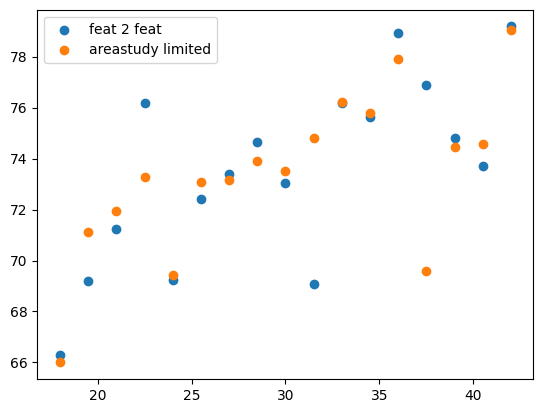

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df1['Distance(m)'],df1['Path_Loss(dB)'],label='feat 2 feat')
plt.scatter(df4['Distance(m)'],df4['Path_Loss(dB)'],label='areastudy limited')
plt.legend()

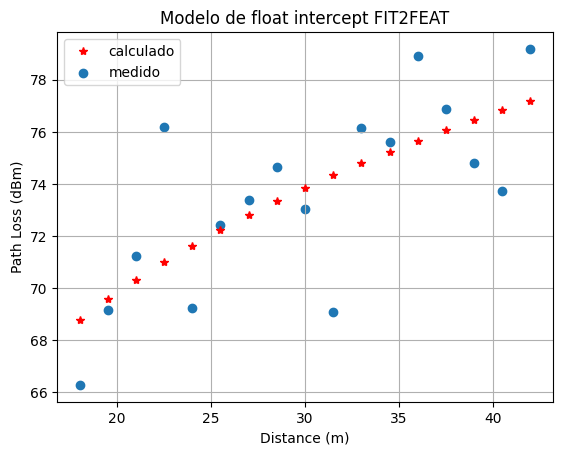

Erro Quadrático Médio (MSE): 2.423148715496439


In [21]:
#prx = df.Power
import numpy as np

# Separando as colunas
d = df1['Distance(m)']
pl = df1['Path_Loss(dB)']

# pl = prx

# Cálculo Beta
logd = 10 * np.log10(d)
b = (np.sum(logd)) ** 2
a = np.sum(logd ** 2)
denbeta = a - (b / len(logd))
numbeta = np.sum((logd * pl)) - ((np.sum(logd) * np.sum(pl)) / len(logd))
beta = numbeta / denbeta

# Cálculo alfa
y = np.sum(pl) / len(pl)
x = np.sum(logd) / len(logd)
alfa = y - beta * x

# Float Intercept
fi1 = alfa + 10 * beta * np.log10(d)

# Plot do gráfico
plt.figure()
plt.plot(d, fi1,'*r',label='calculado')
plt.scatter(d, pl, label='medido')
plt.grid(True)
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dBm)')
plt.title('Modelo de float intercept FIT2FEAT')
plt.legend()
plt.show()

# Cálculo do Erro Quadrático Médio (MSE)
MSE = np.sqrt(np.sum((pl - fi1) ** 2) / len(pl))
print('Erro Quadrático Médio (MSE):', MSE)


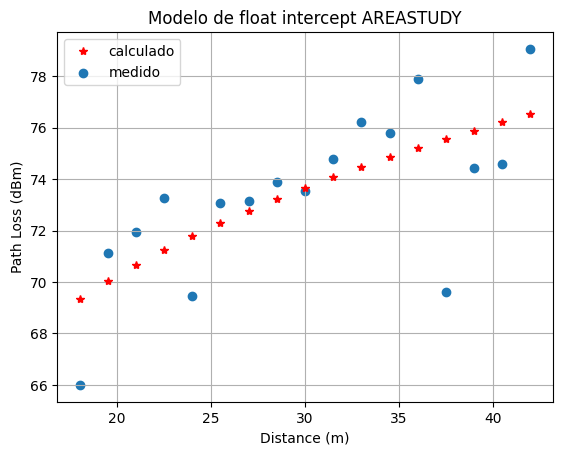

Erro Quadrático Médio (MSE): 2.212034705495521


In [22]:
#prx = df.Power
import numpy as np

# Separando as colunas
d = df4['Distance(m)']
pl = df4['Path_Loss(dB)']

# pl = prx

# Cálculo Beta
logd = 10 * np.log10(d)
b = (np.sum(logd)) ** 2
a = np.sum(logd ** 2)
denbeta = a - (b / len(logd))
numbeta = np.sum((logd * pl)) - ((np.sum(logd) * np.sum(pl)) / len(logd))
beta = numbeta / denbeta

# Cálculo alfa
y = np.sum(pl) / len(pl)
x = np.sum(logd) / len(logd)
alfa = y - beta * x

# Float Intercept
fi4 = alfa + 10 * beta * np.log10(d)

# Plot do gráfico
plt.figure()
plt.plot(d, fi4,'*r',label='calculado')
plt.scatter(d, pl, label='medido')
plt.grid(True)
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dBm)')
plt.title('Modelo de float intercept AREASTUDY')
plt.legend()
plt.show()

# Cálculo do Erro Quadrático Médio (MSE)
MSE = np.sqrt(np.sum((pl - fi4) ** 2) / len(pl))
print('Erro Quadrático Médio (MSE):', MSE)


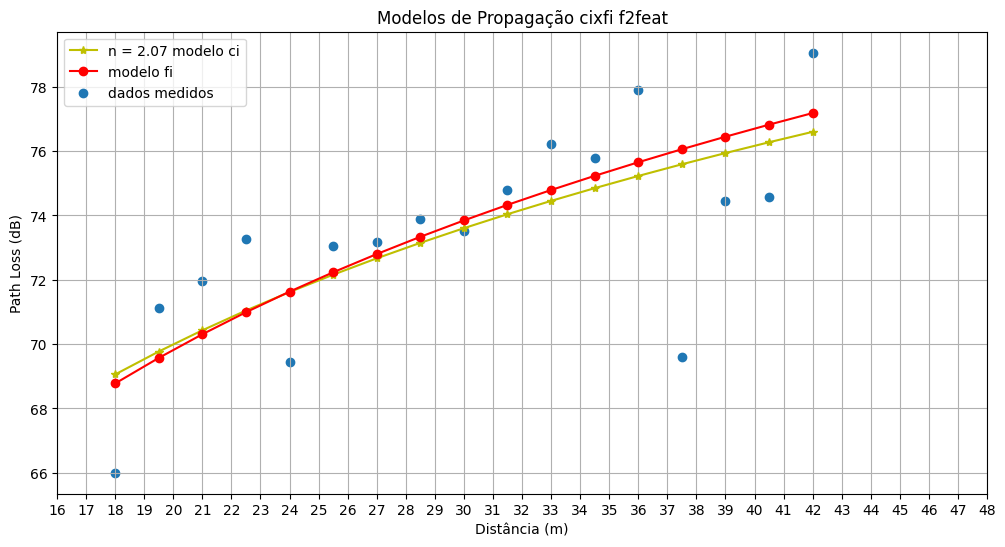

(2.0654901494522786, 2.2164516621595434)

In [31]:

d0 = 1.010  # Distância de referência em metros

y = (3 * 10 ** 8) / (3.5 * 10 ** 9)

# Separando as colunas
d = df1['Distance(m)']
pt = 51
L = df1['Path_Loss(dB)']


# Definição das variáveis de entrada
d0 = 1
prxo = pt - L[0]

Lo = 20 * np.log10((4 * np.pi) / y)  # path loss da primeira medida
D = 10 * np.log10(d / d0)
D = np.array(D)
n = np.linalg.lstsq(D.reshape(-1, 1), (L - Lo), rcond=None)[0]  # regressão linear

# Cálculo da potência do sinal recebido
ci = 20 * np.log10((4 * np.pi * d0) / y) + 10 * 2.05 * np.log10(d / d0)

# Plot do gráfico
plt.figure(figsize=(12,6))
plt.plot(d, ci,'-*y', label=f'n = {n[0]:.2f} modelo ci')
plt.plot(d,fi1,'-or',label='modelo fi')
plt.scatter(d, pl,label='dados medidos')  # Use 'o-' para plotar pontos conectados por linhas
plt.grid(True)
plt.xticks(np.arange(16, 49, step=1))
plt.xlabel('Distância (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Modelos de Propagação cixfi f2feat')
plt.legend()
plt.show()
def root_mse(observed, predicted):
    mse = np.mean((predicted - observed) ** 2)
    rmse = np.sqrt(mse)
    return rmse
n[0],root_mse(pl,ci)

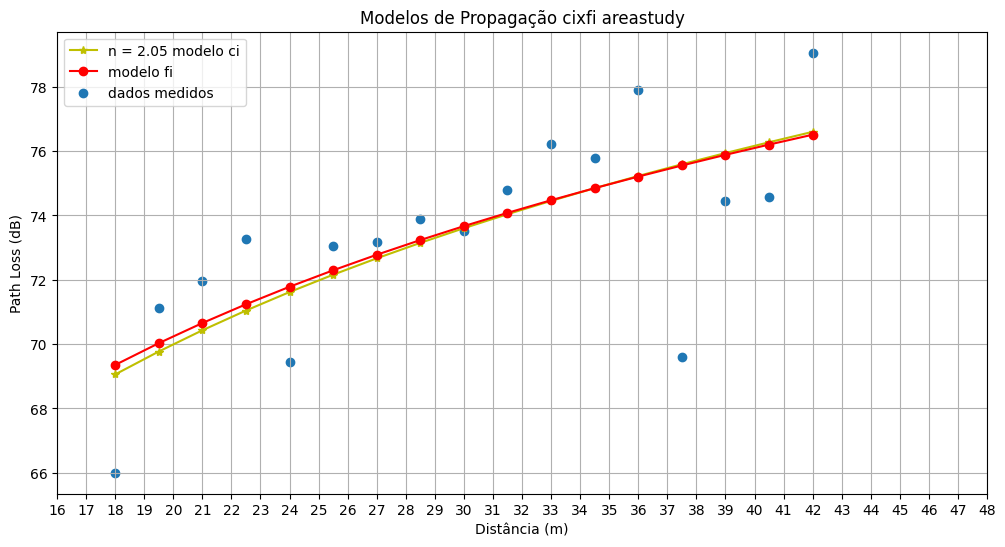

(2.2164516621595434, 2.0547073741507718)

In [30]:

d0 = 1.010  # Distância de referência em metros

y = (3 * 10 ** 8) / (3.5 * 10 ** 9)

# Separando as colunas
d = df4['Distance(m)']
pt = 51
L = df4['Path_Loss(dB)']


# Definição das variáveis de entrada
d0 = 1
prxo = pt - L[0]

Lo = 20 * np.log10((4 * np.pi) / y)  # path loss da primeira medida
D = 10 * np.log10(d / d0)
D = np.array(D)
n = np.linalg.lstsq(D.reshape(-1, 1), (L - Lo), rcond=None)[0]  # regressão linear

# Cálculo da potência do sinal recebido
ci4 = 20 * np.log10((4 * np.pi * d0) / y) + 10 * 2.05 * np.log10(d / d0)

# Plot do gráfico
plt.figure(figsize=(12,6))
plt.plot(d, ci4,'-*y', label=f'n = {n[0]:.2f} modelo ci')
plt.plot(d,fi4,'-or',label='modelo fi')
plt.scatter(d, pl,label='dados medidos')  # Use 'o-' para plotar pontos conectados por linhas
plt.grid(True)
plt.xticks(np.arange(16, 49, step=1))
plt.xlabel('Distância (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Modelos de Propagação cixfi areastudy')
plt.legend()
plt.show()
def root_mse(observed, predicted):
    mse = np.mean((predicted - observed) ** 2)
    rmse = np.sqrt(mse)
    return rmse
root_mse(pl,ci4),n[0]

2.2164516621595434